In [1]:
#library(pcaMethods)
#library(pcaReduce)
library(SC3)
library(scater)
library(scran)
library(SingleCellExperiment)
library(pheatmap)
library(mclust)
set.seed(1234567)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain intro

In [2]:
umi <- readRDS("post_common_normalisation_approaches.rds")
umi <- computeSumFactors(umi)
umi <- normalize(umi)

The following selected_variables were not found in colData(object): pct_counts_feature_controlsThe following selected_variables were not found in colData(object): total_features_feature_controlsThe following selected_variables were not found in colData(object): log10_total_counts_endogenousThe following selected_variables were not found in colData(object): log10_total_counts_feature_controls
Other variables from colData(object) can be used by specifying a vector of variable names as the selected_variables argument.
PCA is being conducted using the following variables:pct_counts_top_100_featurestotal_features
sROC 0.1-2 loaded


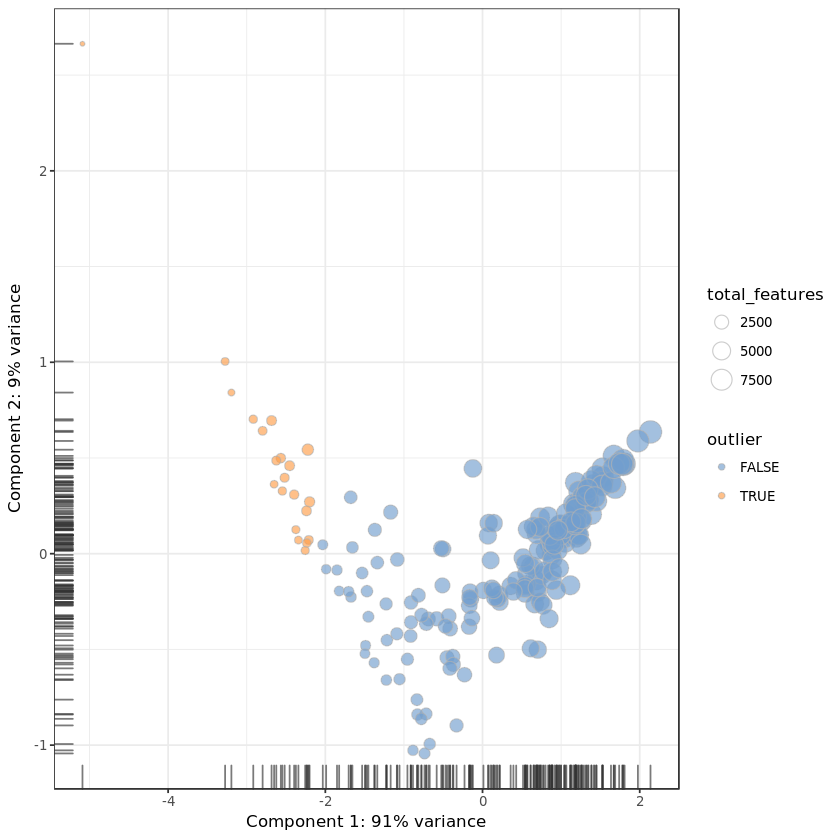

In [3]:
umi <- plotPCA(
    umi,
    size_by = "total_features", 
    #shape_by = "use",
    pca_data_input = "pdata",
    detect_outliers = TRUE,
    return_SCE = TRUE
)

#plotPCA(umi, colour_by = "outlier")


In [4]:
umi <- sc3_estimate_k(umi)
metadata(umi)$sc3$k_estimation

Estimating k...


[1] 4

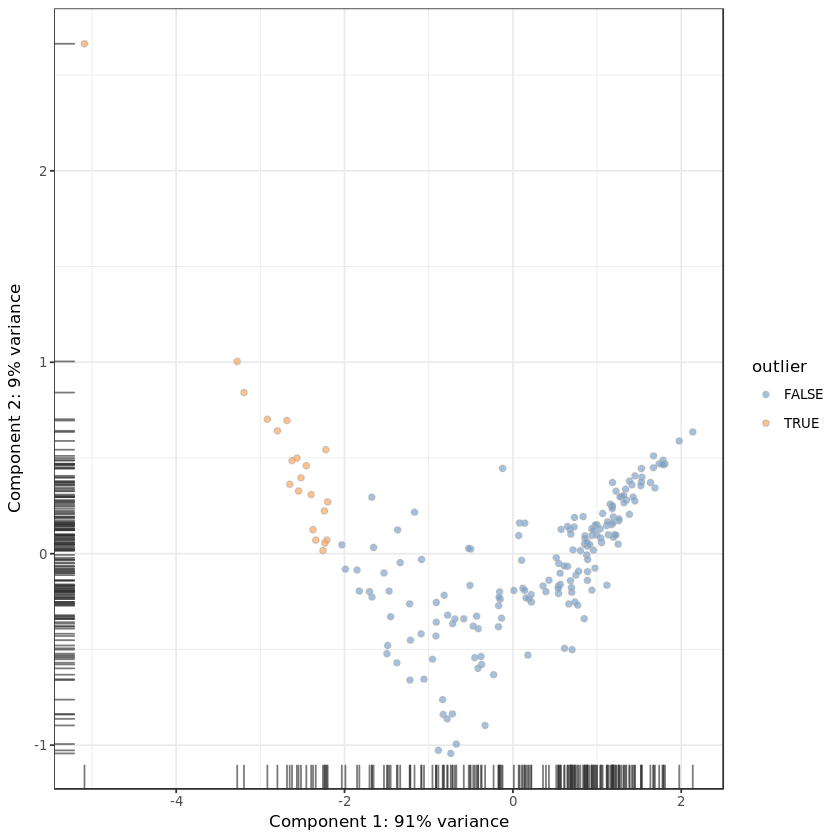

In [5]:
plotPCA(umi, colour_by = "outlier")

In [6]:
rowData(umi)$feature_symbol <- rownames(umi)   # oddly needed to run SC3...
umi <- sc3(umi, ks = 3:7, biology = TRUE)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...
Calculating biology...


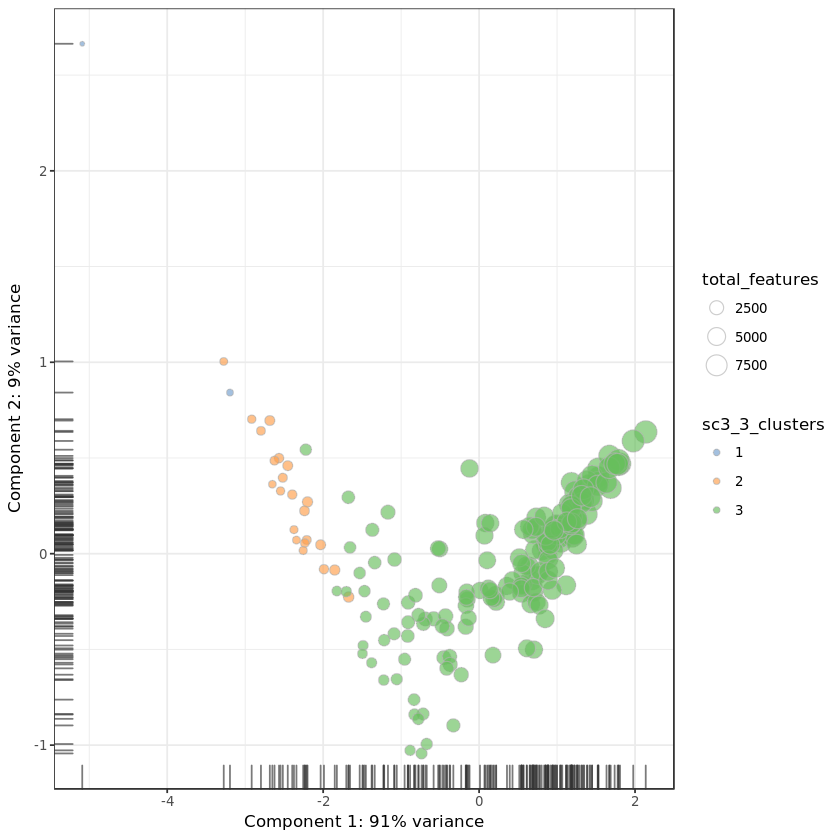

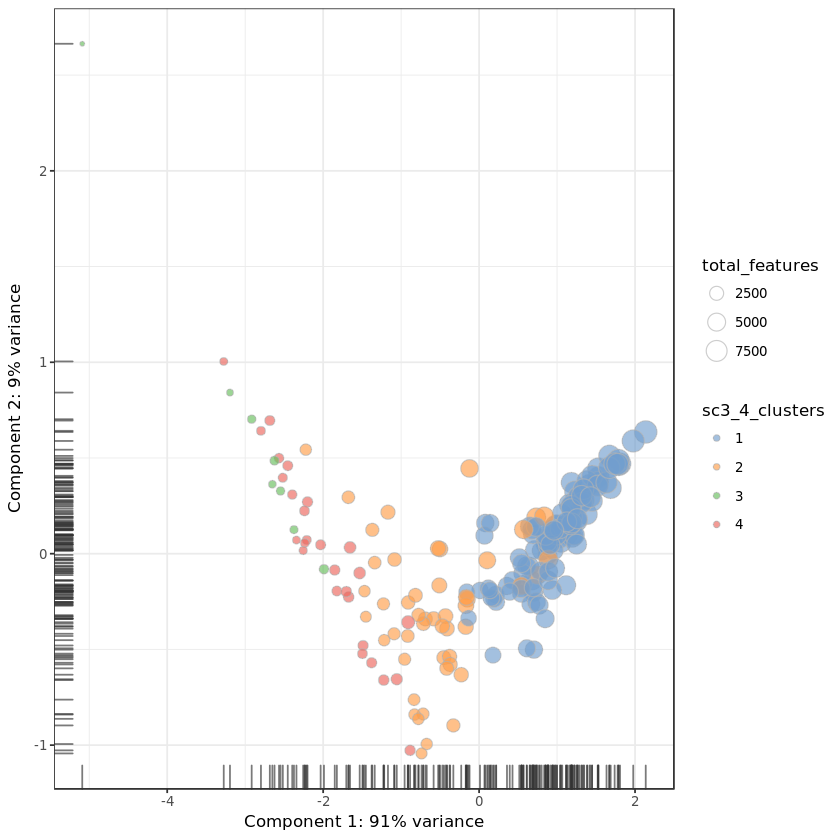

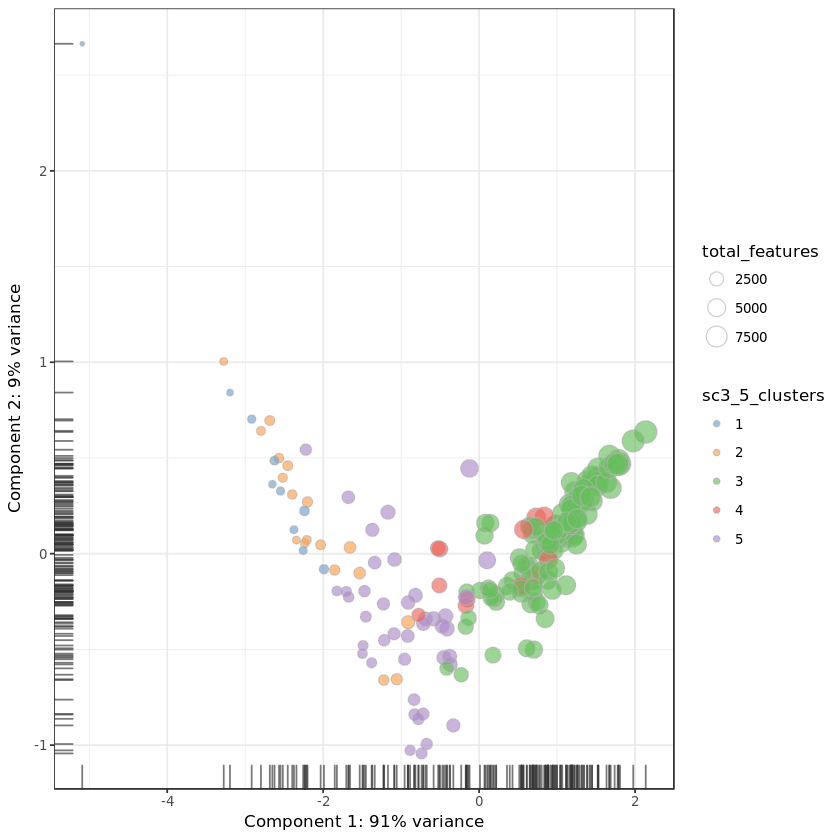

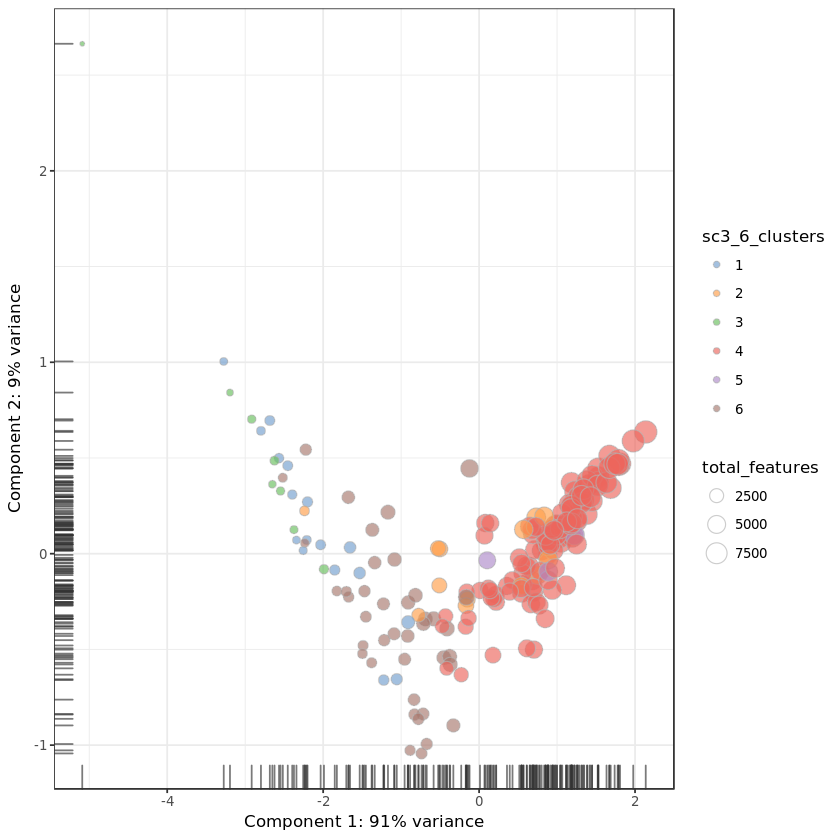

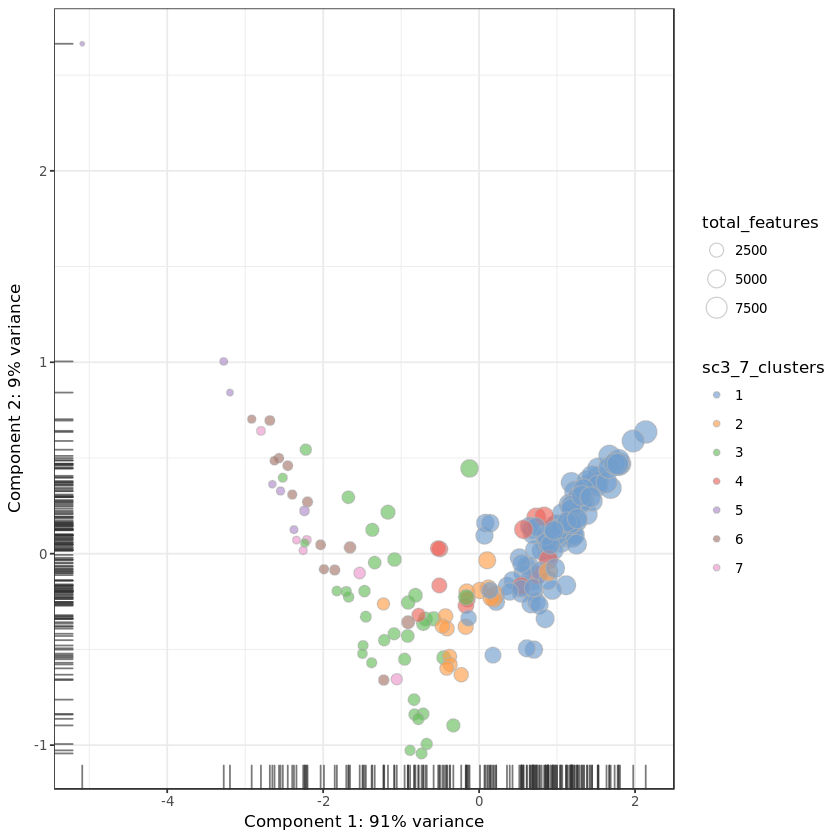

In [11]:
#sc3_plot_consensus(umi, k = 4, show_pdata = "outlier")
#sc3_plot_silhouette(umi, k = 4)
#sc3_plot_expression(umi, k = 4, show_pdata = "outlier")
#sc3_plot_markers(umi, k = 4, show_pdata = "outlier")
plotPCA(
    umi, 
    colour_by = "sc3_3_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_4_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_5_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_6_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_7_clusters",
    size_by = "total_features"
)

In [12]:
umi <- sc3(umi, ks = 8:12, biology = TRUE)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...
Calculating biology...


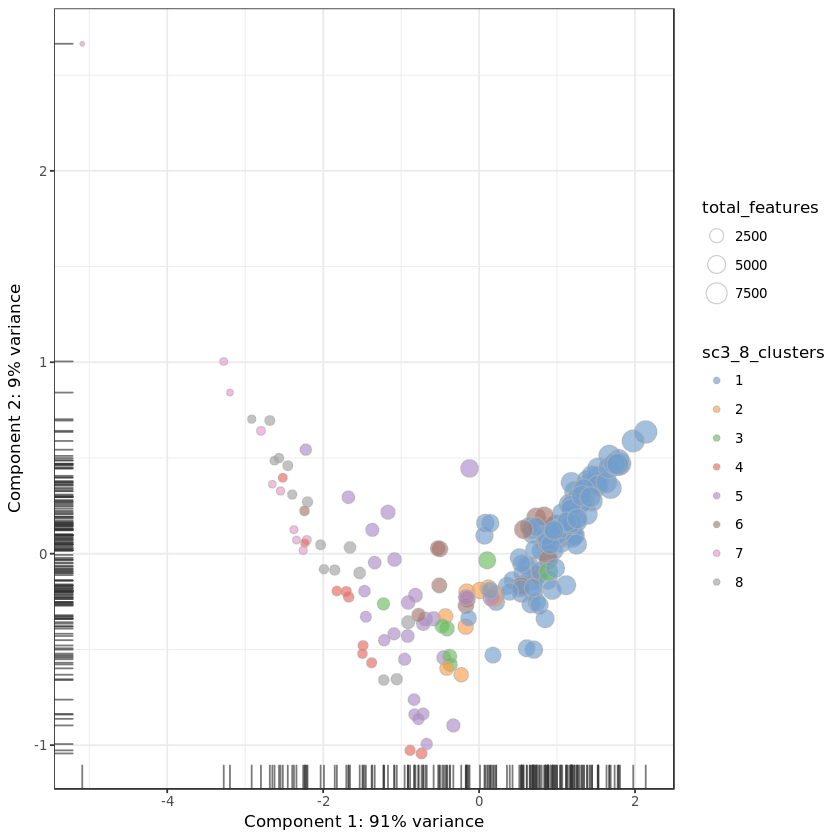

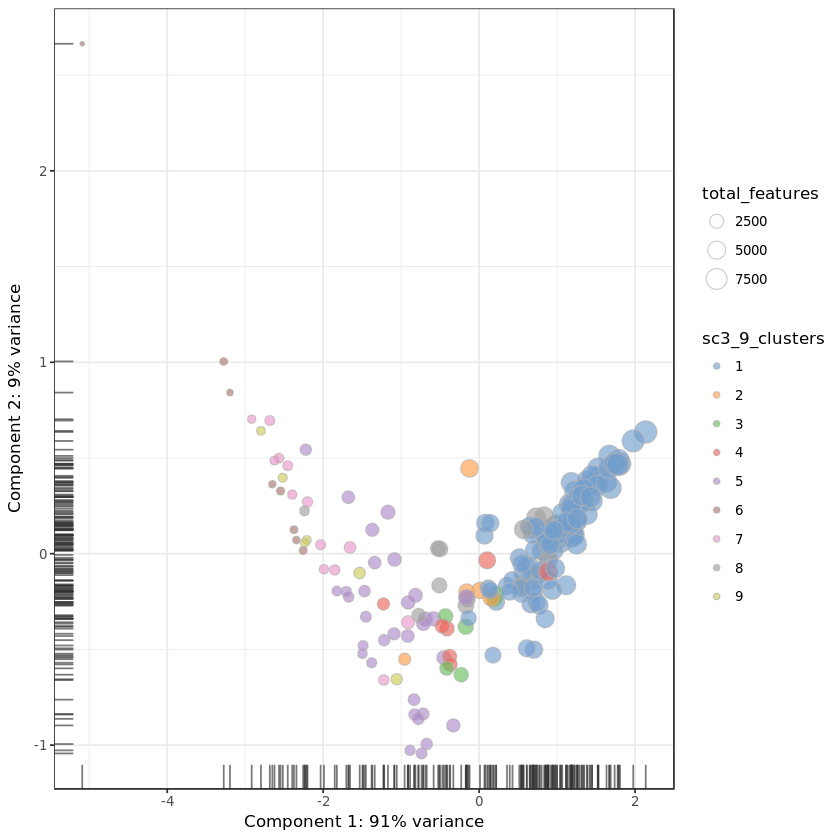

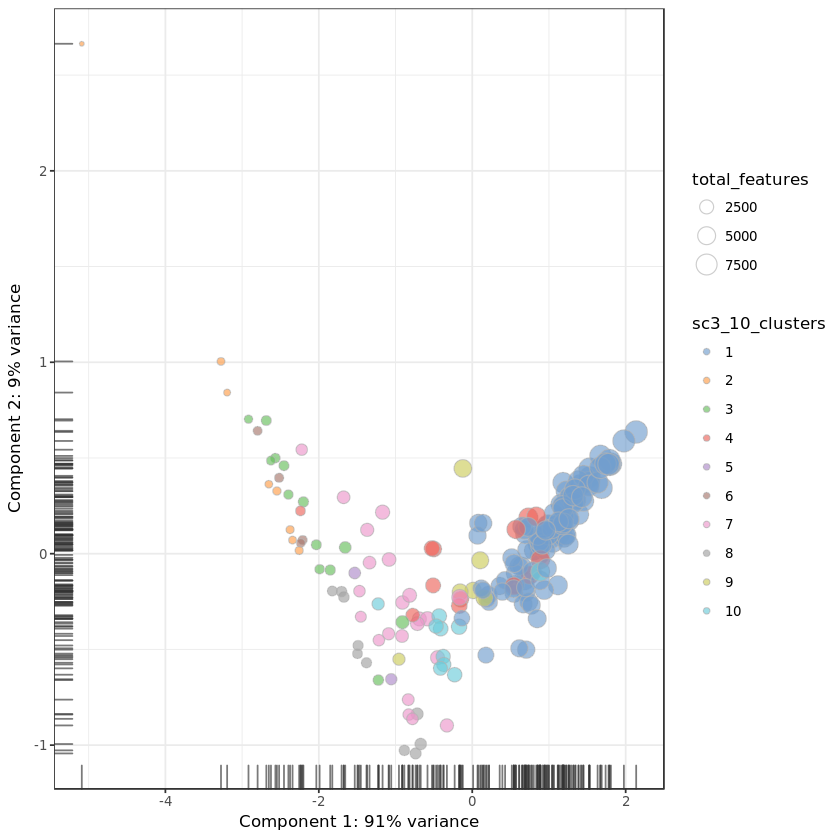

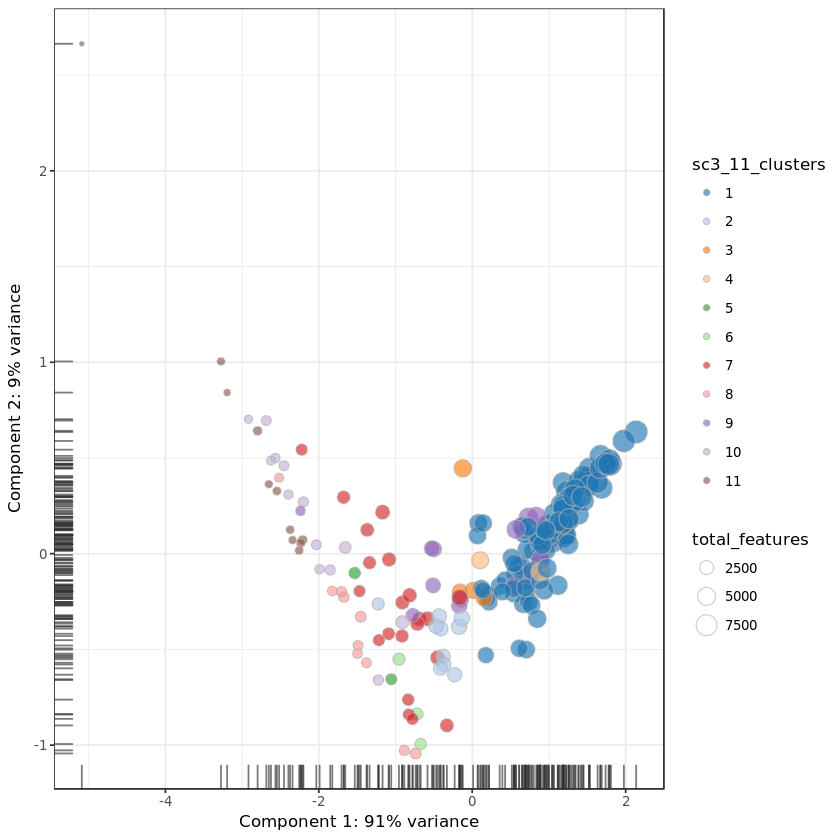

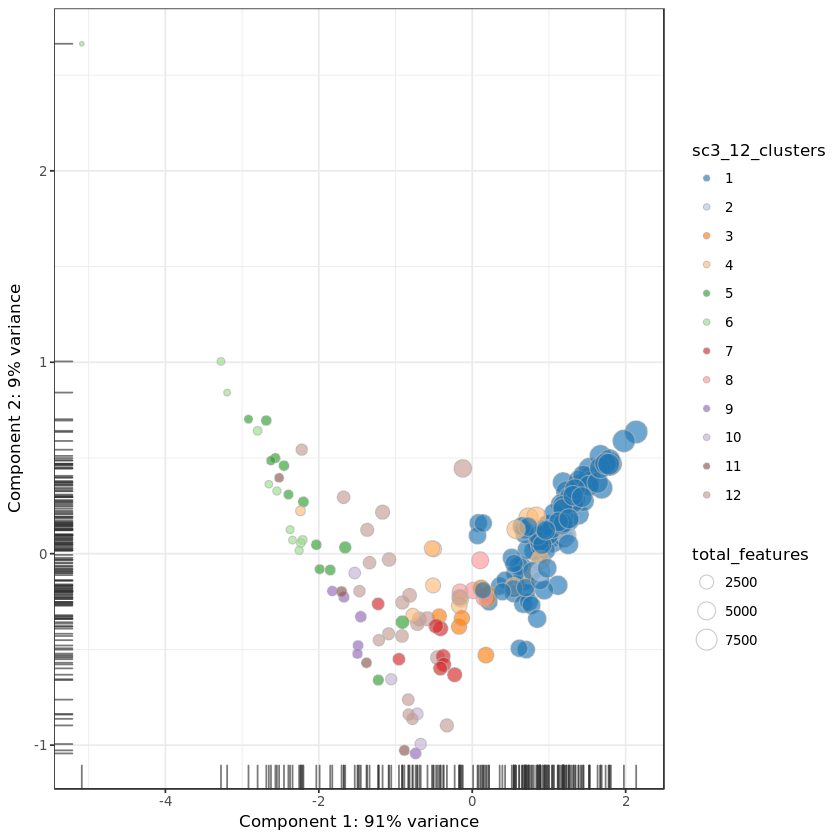

In [13]:
plotPCA(
    umi, 
    colour_by = "sc3_8_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_9_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_10_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_11_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_12_clusters",
    size_by = "total_features"
)

In [14]:
sc3_interactive(umi)

Columns 'is_cell_control', 'filter_welldef_lowgenes' were excluded from annotation since they contained only a single value.

Listening on http://127.0.0.1:5569


In [17]:
# PCA reduce
library(pcaReduce)

input <- logcounts(umi[rowData(umi)$sc3_gene_filter, ])
pca.red <- PCAreduce(t(input), nbt = 1, q = 30, method = 'S')[[1]]

Loading required package: pcaMethods

Attaching package: ‘pcaMethods’

The following object is masked from ‘package:stats’:

    loadings

Loading required package: mnormt


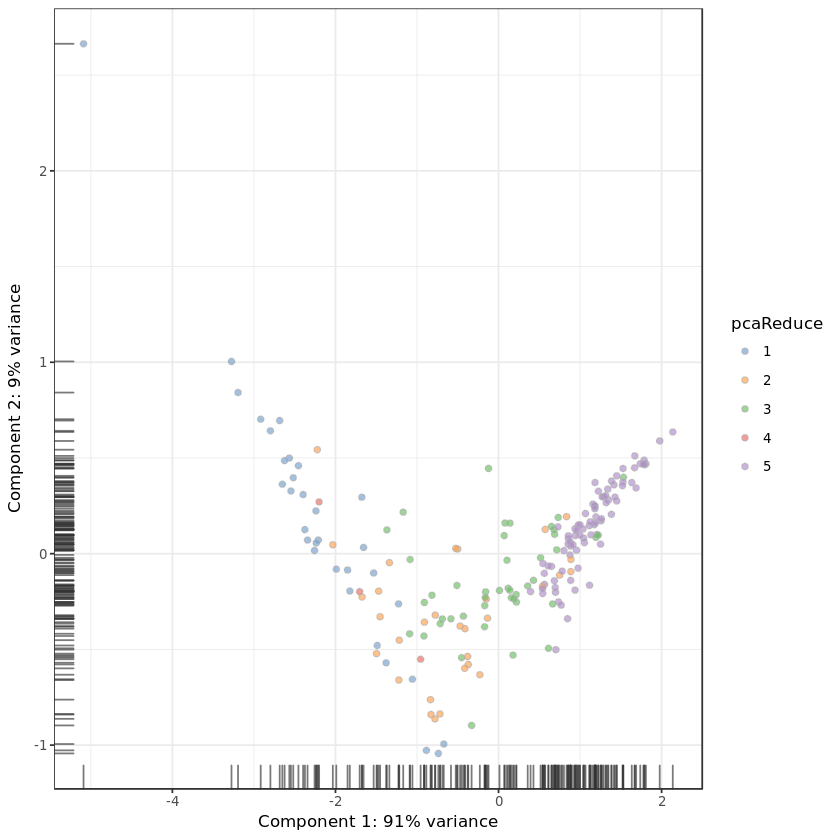

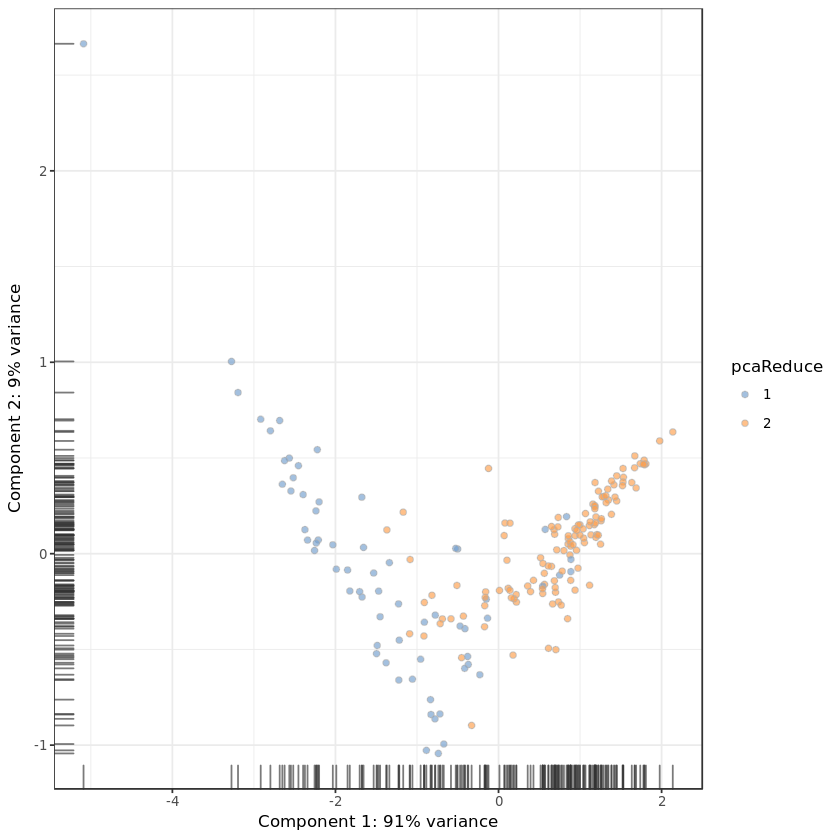

In [32]:
colData(umi)$pcaReduce <- as.character(pca.red[,32 - 5])
plotPCA(umi, colour_by = "pcaReduce")

colData(umi)$pcaReduce <- as.character(pca.red[,32 - 2])
plotPCA(umi, colour_by = "pcaReduce")

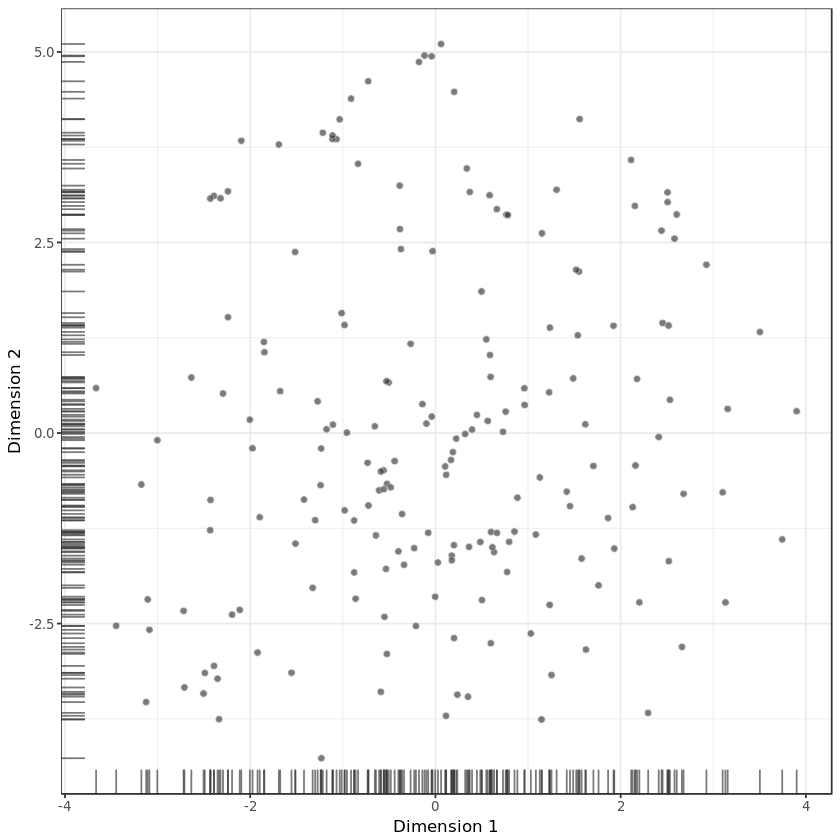

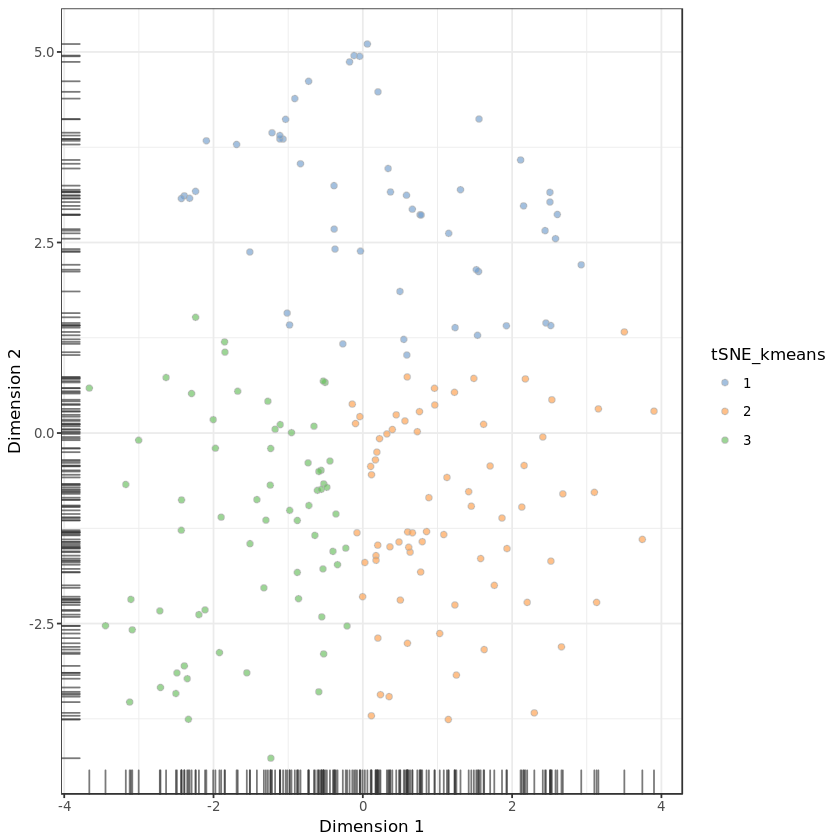

In [38]:
# tSNE + kMeans
umi <- plotTSNE(umi, rand_seed = 1231231, return_SCE = TRUE)
colData(umi)$tSNE_kmeans <- as.character(kmeans(umi@reducedDims$TSNE, centers = 3)$clust)
plotTSNE(umi, rand_seed = 1, colour_by = "tSNE_kmeans")